# Example of events generation
## 1. Generate python data structure

In [1]:
import sys
sys.path.append('../')

In [2]:
from helixgen.phspdecay import generate
import jax
import jax.numpy as np
import jax.random as rjax
import numpy as onp
rng = rjax.PRNGKey(seed=0)

/home/vitaly/miniconda3/envs/tf2/lib/python3.8/site-packages/jax/lib/xla_bridge.py:125: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [3]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16)
matplotlib.rc('font', size=18)

Generate 10000 events of the $D^+ \to [K^{*0} \to K^-\pi^+]\pi^+$ decay

In [4]:
%%time
w, events = generate(rng, '', 5000)

CPU times: user 5.83 s, sys: 20.5 ms, total: 5.85 s
Wall time: 5.83 s


Weights are trivial for this decay

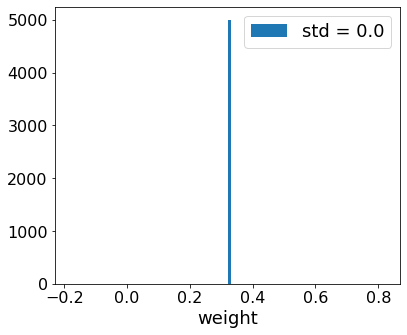

In [5]:
fig, ax = plt.subplots(figsize=(6,5))
ax.hist(w, bins=100, label=f'std = {w.std()}');
ax.set_xlabel('weight')
ax.legend()
fig.tight_layout()

In [6]:
jax.tree_map(np.shape, events)

{'D+_pi+': {'hel': Helix(d0=(5000,), phi0=(5000,), omega=(5000,), z0=(5000,), tanl=(5000,)),
  'helcov': (5000, 5, 5),
  'meas_mom': Momentum(px=(5000,), py=(5000,), pz=(5000,)),
  'meas_pos': Position(x=(5000,), y=(5000,), z=(5000,)),
  'mom': Momentum(px=(5000,), py=(5000,), pz=(5000,)),
  'pcl': (),
  'pos': Position(x=(5000,), y=(5000,), z=(5000,))},
 'K*0': {'mom': Momentum(px=(5000,), py=(5000,), pz=(5000,)),
  'pcl': (),
  'pos': Position(x=(5000,), y=(5000,), z=(5000,))},
 'K-': {'hel': Helix(d0=(5000,), phi0=(5000,), omega=(5000,), z0=(5000,), tanl=(5000,)),
  'helcov': (5000, 5, 5),
  'meas_mom': Momentum(px=(5000,), py=(5000,), pz=(5000,)),
  'meas_pos': Position(x=(5000,), y=(5000,), z=(5000,)),
  'mom': Momentum(px=(5000,), py=(5000,), pz=(5000,)),
  'pcl': (),
  'pos': Position(x=(5000,), y=(5000,), z=(5000,))},
 'pi+': {'hel': Helix(d0=(5000,), phi0=(5000,), omega=(5000,), z0=(5000,), tanl=(5000,)),
  'helcov': (5000, 5, 5),
  'meas_mom': Momentum(px=(5000,), py=(5000,),

Generated position for all particles is zero since there is $D^+$ is at rest and $K^{*0}$ does not live long enough to fly any distance

In [7]:
def make_hist(ax, data, lbl, bins=100, rng=None):
    ax.hist(data, bins=bins, label=f'std = {data.std():.3f}\nmean = {data.mean():.3f}', range=rng);
    ax.set_xlabel(lbl)
    ax.legend()

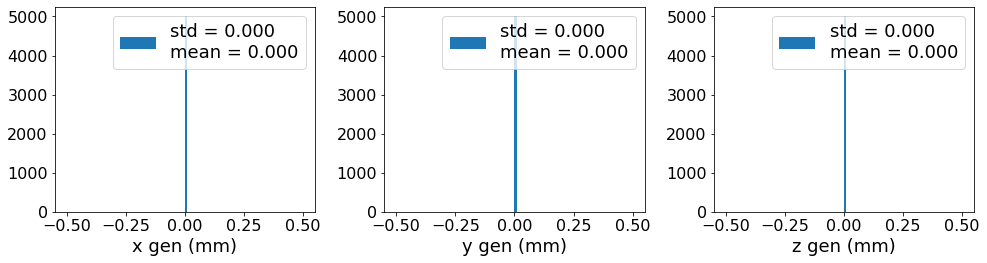

In [8]:
pip_gen_pos = events['pi+']['pos']

fig, ax = plt.subplots(ncols=3, figsize=(14, 4))
make_hist(ax[0], pip_gen_pos.x, 'x gen (mm)')
make_hist(ax[1], pip_gen_pos.y, 'y gen (mm)')
make_hist(ax[2], pip_gen_pos.z, 'z gen (mm)')
fig.tight_layout()

So, the measured position gives us the spatial resolution

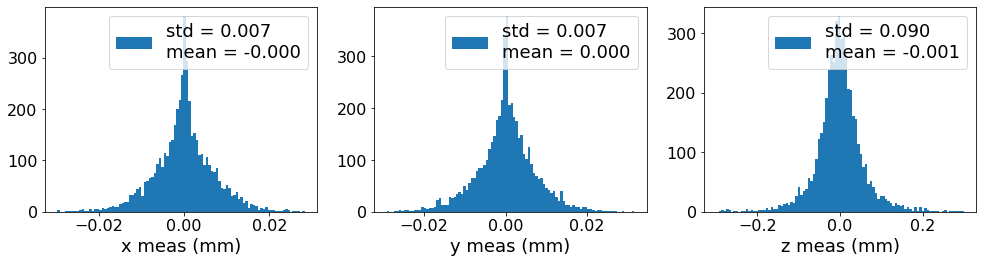

In [9]:
pip_meas_pos = events['pi+']['meas_pos']

fig, ax = plt.subplots(ncols=3, figsize=(14, 4))
make_hist(ax[0], pip_meas_pos.x, 'x meas (mm)')
make_hist(ax[1], pip_meas_pos.y, 'y meas (mm)')
make_hist(ax[2], pip_meas_pos.z, 'z meas (mm)', rng=[-0.3, 0.3])
fig.tight_layout()

Distribution of the helix parameters

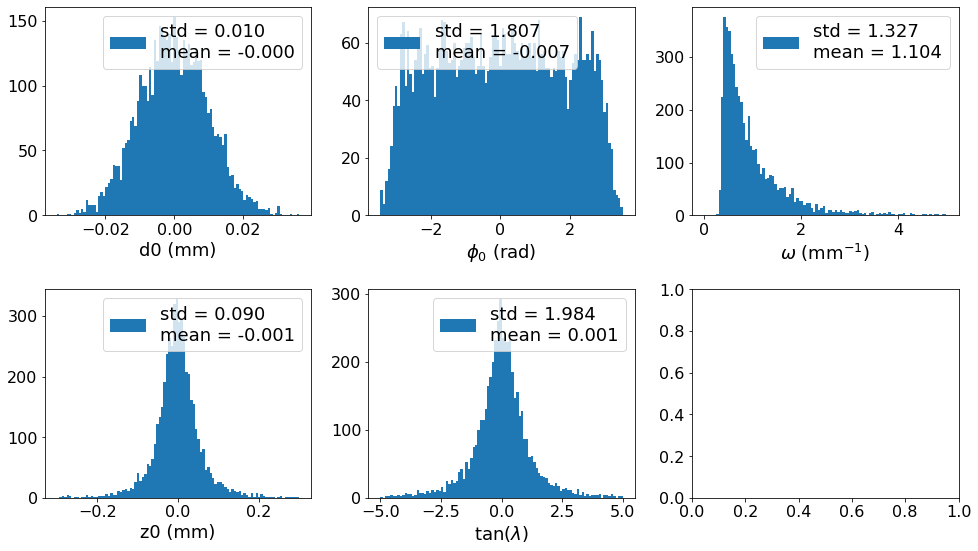

In [10]:
pip_helix = events['pi+']['hel']

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(14, 8))
make_hist(ax[0,0], pip_helix.d0, 'd0 (mm)')
make_hist(ax[0,1], pip_helix.phi0, r'$\phi_{0}$ (rad)')
make_hist(ax[0,2], pip_helix.omega, r'$\omega$ (mm${}^{-1}$)', rng=[0, 5])
make_hist(ax[1,0], pip_helix.z0, 'z0 (mm)', rng=[-0.3, 0.3])
make_hist(ax[1,1], pip_helix.tanl, 'tan($\lambda$)', rng=[-5, 5])
fig.tight_layout()

Helix covariance matrix

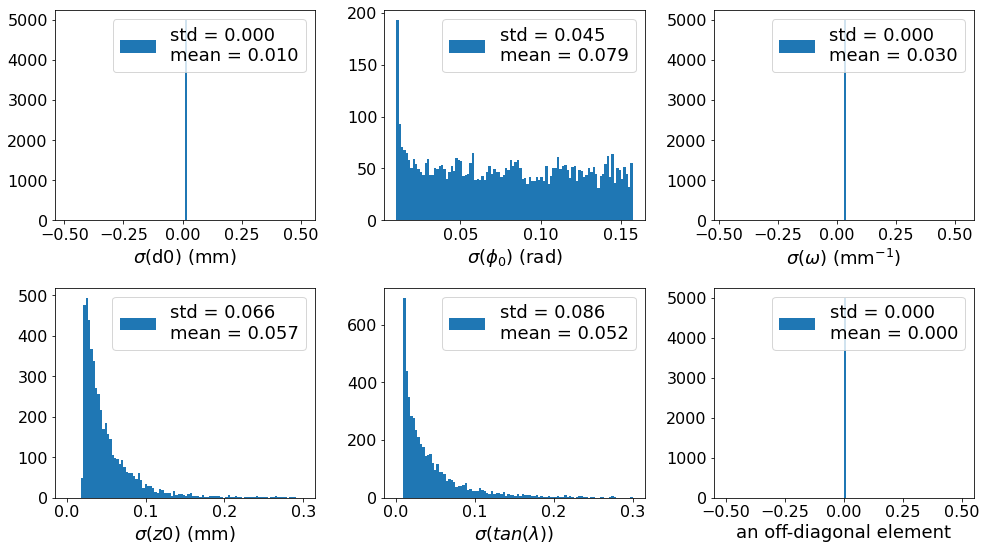

In [11]:
pip_helix_cov = events['pi+']['helcov']

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(14, 8))
make_hist(ax[0,0], onp.sqrt(pip_helix_cov[:,0,0]), r'$\sigma$(d0) (mm)')
make_hist(ax[0,1], onp.sqrt(pip_helix_cov[:,1,1]), r'$\sigma(\phi_{0})$ (rad)')
make_hist(ax[0,2], onp.sqrt(pip_helix_cov[:,2,2]), r'$\sigma(\omega)$ (mm${}^{-1}$)')
make_hist(ax[1,0], onp.sqrt(pip_helix_cov[:,3,3]), r'$\sigma(z0)$ (mm)', rng=[0, 0.3])
make_hist(ax[1,1], onp.sqrt(pip_helix_cov[:,4,4]), r'$\sigma(tan(\lambda))$', rng=[0, 0.3])
make_hist(ax[1,2], pip_helix_cov[:,0,1], 'an off-diagonal element')
fig.tight_layout()

## 2. Generate json file

In [12]:
# from helixgen.mcproducer import produce_and_serialize_to_json
# import json

In [13]:
# produce_and_serialize_to_json(rng, decstr='', nevts=10, lbl='dkstpi')

In [14]:
# with open('dkstpi.json', 'r') as f:
#     evts = json.loads(f.read())

Get the same $K^-$ helix

In [15]:
# np.array(evts['K-']['hel'])